In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [175]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset contains information on 200 mall customers, each uniquely identified by a CustomerID. It consists of five variables — four numerical (Age, Annual Income (k$), Spending Score (1-100), and CustomerID) and one categorical (Gender). There are no missing values, indicating a clean and complete dataset suitable for analysis. The mix of numeric and categorical data allows both demographic and behavioral segmentation: Gender can be used for descriptive comparisons, while the numeric attributes are ideal for clustering and correlation analysis. Overall, the dataset provides a balanced structure for exploring customer profiles and identifying distinct market segments based on spending habits, income levels, and age distribution.

In [177]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The mall customers dataset consists of 200 individuals aged between 18 and 70 years, with an average age of about 39 years, showing a moderately young customer base. Their annual income ranges widely from $15k to $137k, with an average of around $60k, indicating a mix of lower-, middle-, and high-income shoppers. The spending score, which measures shopping behavior, averages 50 on a 1–100 scale but varies greatly, suggesting distinct spending habits among customers—from very frugal to highly active spenders. This diversity in age, income, and spending patterns highlights clear potential for customer segmentation using clustering techniques such as K-Means to identify meaningful consumer groups and tailor marketing strategies accordingly.

In [178]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [179]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

Data is clean but we dont need Customer ID

In [180]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [181]:
df = df[['Gender','Age', 'Annual Income', 'Spending Score']]
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/tmp/ipython-input-2536535664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


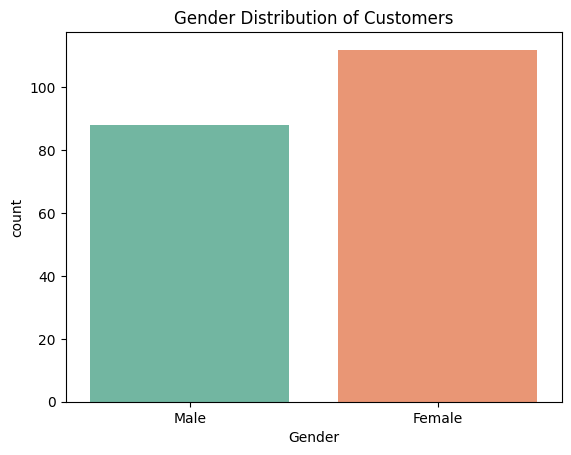

In [182]:
# Gender Distribution
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution of Customers")
plt.show()

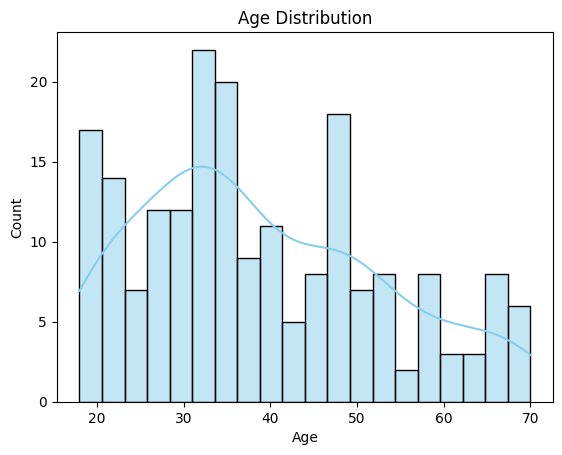

In [183]:
# Age Distribution
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

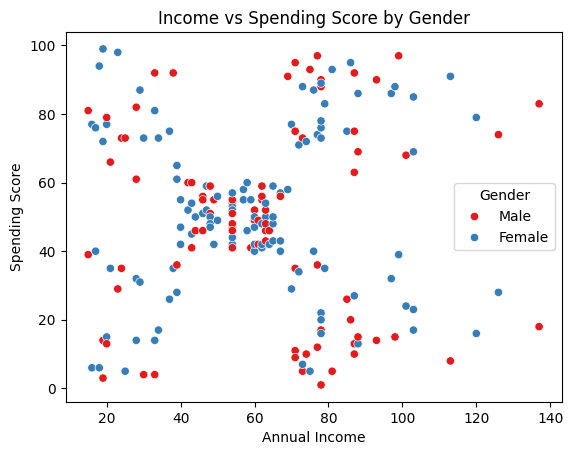

In [184]:
# Income vs Spending
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Gender', data=df, palette='Set1')
plt.title("Income vs Spending Score by Gender")
plt.show()

# Data Transformation

In [185]:
# Encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Data Scaling

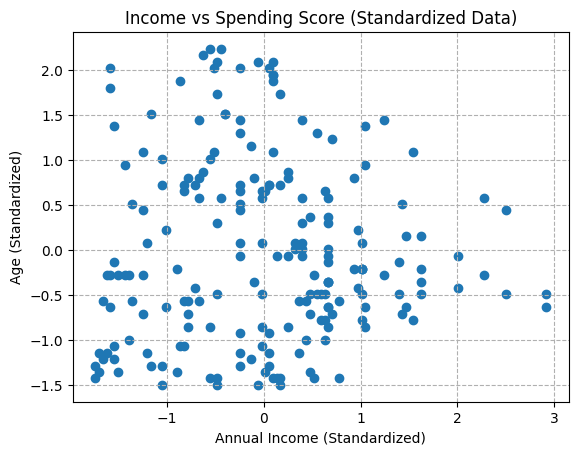

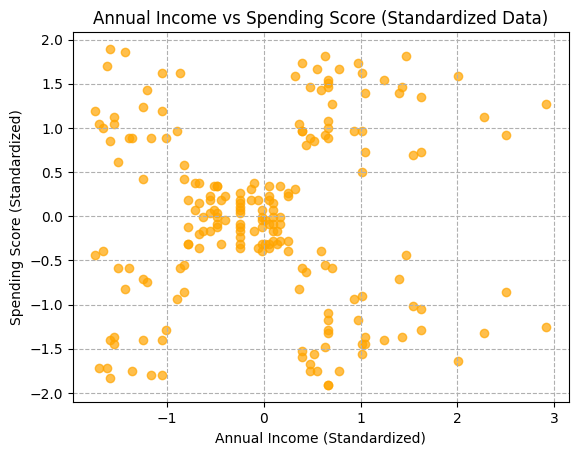

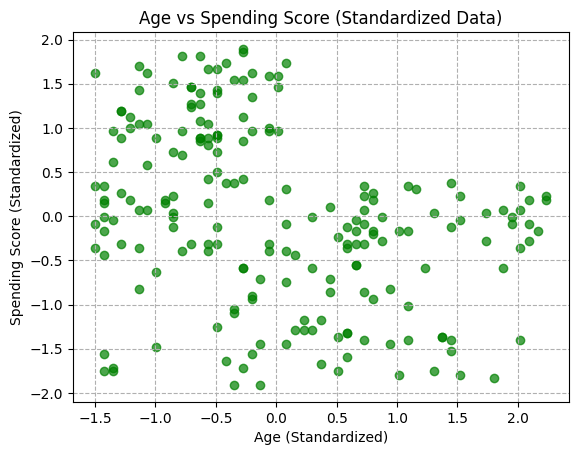

In [186]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc = StandardScaler()

# pilih kolom numerik
cols_to_scale = ['Age', 'Annual Income', 'Spending Score']

df_sc_scaled = pd.DataFrame(
    sc.fit_transform(df[cols_to_scale]),
    columns=['Age', 'Annual Income', 'Spending Score']
)

# tampilkan hasil
df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Annual Income"], df_sc_scaled["Age"])
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Age (Standardized)")
plt.grid(axis='both', linestyle='--')
plt.title("Income vs Spending Score (Standardized Data)")
plt.show()

plt.scatter(df_sc_scaled["Annual Income"], df_sc_scaled["Spending Score"], alpha=0.7, color='orange')
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.grid(axis='both', linestyle='--')
plt.title("Annual Income vs Spending Score (Standardized Data)")
plt.show()

plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Spending Score"], alpha=0.7, color='green')
plt.xlabel("Age (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.grid(axis='both', linestyle='--')
plt.title("Age vs Spending Score (Standardized Data)")
plt.show()


# K-Means Clustering

In [187]:
from sklearn.cluster import KMeans

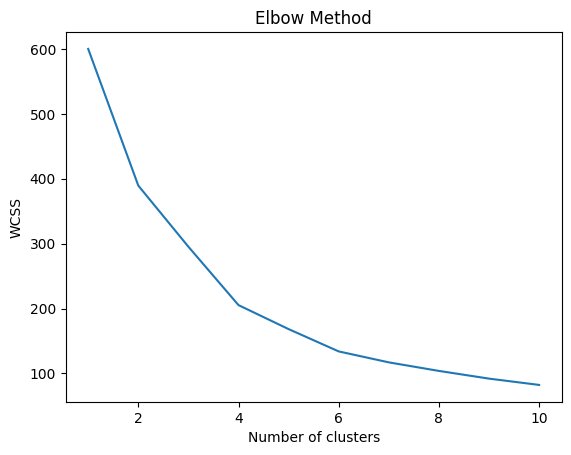

In [188]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

This Elbow Method chart illustrates how the Within-Cluster Sum of Squares (WCSS) decreases as the number of clusters increases. Initially, WCSS drops sharply from 1 to around 3 clusters, meaning that adding more clusters significantly improves how tightly the data points are grouped. However, after about K = 4, the curve begins to flatten, showing that the marginal gain in compactness becomes smaller with each additional cluster. The point where the curve bends  the “elbow”  indicates the most appropriate number of clusters, balancing simplicity and accuracy. Therefore, the optimal number of clusters is around 4, as it captures the major data structure without unnecessary complexity or overfitting.

In [189]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


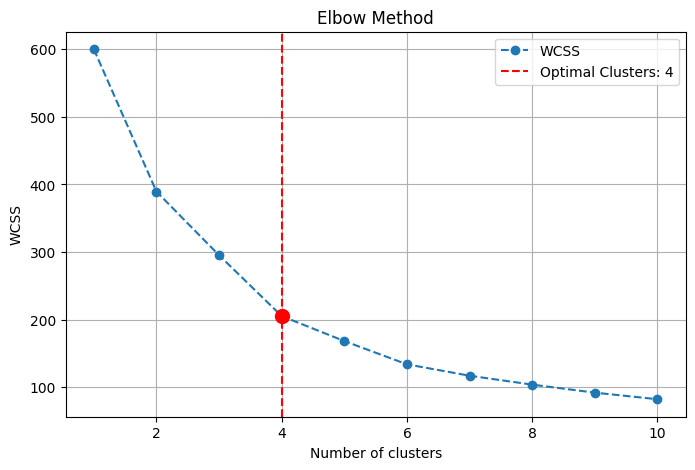

The optimal number of clusters is: 4


In [190]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

The Elbow Method graph shows the relationship between the number of clusters (K) and the Within-Cluster Sum of Squares (WCSS), which measures how compact the clusters are. As the number of clusters increases, WCSS decreases because points are grouped more closely. However, the rate of decrease slows significantly after K = 4, forming a clear “elbow” point on the curve. This indicates that four clusters provide the best balance between model simplicity and cluster compactness adding more clusters beyond this point would only result in minimal improvement while increasing model complexity. Therefore, K = 4 is identified as the optimal number of clusters for this dataset, effectively capturing the main patterns in customer segmentation without overfitting.

In [191]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Annual Income,Spending Score,KMeans_Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0


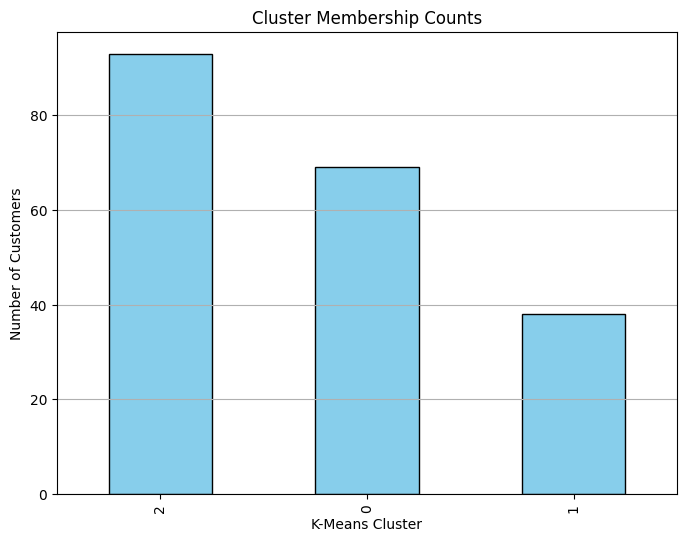

In [192]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


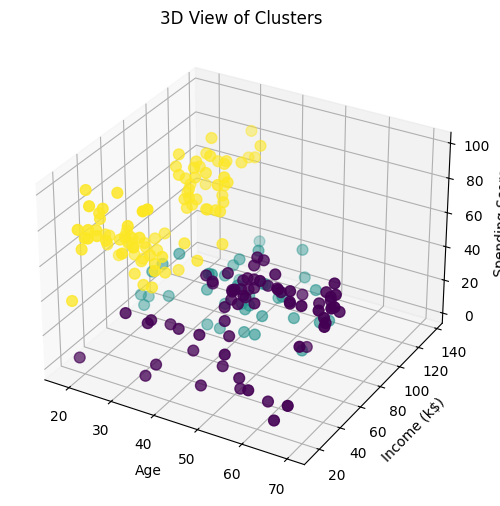

In [193]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income'], df['Spending Score'],
           c=df['KMeans_Cluster'], cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Income (k$)')
ax.set_zlabel('Spending Score')
plt.title('3D View of Clusters')
plt.show()

The 3D cluster visualization shows that customers are clearly segmented into three distinct groups based on their age, income, and spending behavior. The yellow cluster represents younger customers with moderate income but high spending scores, indicating active and trend-driven shoppers. The teal cluster includes customers with moderate income and balanced spending habits, suggesting steady and average consumers. Meanwhile, the purple cluster consists of older customers with varied income levels but low spending scores, showing more conservative or value-conscious buying behavior. Overall, the visualization highlights that spending patterns differ strongly by age and income, emphasizing the importance of personalized marketing strategies for each segment.

In [199]:
# Group the data by cluster and calculate the mean, min, and max for each key variable
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Gender': [lambda x: x.mode()[0], 'min', 'max'],  # Include min, max and mode for Gender
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score': ['mean', 'min', 'max']
})

# Rename axis for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Rename the lambda column to 'mode'
cluster_summary.rename(columns={'<lambda_0>': 'mode'}, level=1, inplace=True)

# Display summary
display(cluster_summary.round(2))

Gender            Age         Annual Income           \
                 mode min max   mean min max          mean min  max   
KMeans_Cluster                                                        
0                   1   0   1  52.61  20  70         46.07  16   79   
1                   0   0   1  39.37  19  59         86.50  64  137   
2                   1   0   1  28.43  18  40         60.71  15  137   

               Spending Score          
                         mean min max  
KMeans_Cluster                         
0                       39.33   3  60  
1                       19.58   1  42  
2                       70.77  39  99



## **Managerial Implications**

### **Cluster 0 — Mature Value Seekers**

**Profile:**

* **Mostly Female (mode = 1)**, age range **20–70**, mean ≈ 53 years.
* **Moderate income** (~$46k) and **moderate spending** (~39 score).
* Represent older, practical shoppers who prioritize value and reliability over trends.

**Managerial Implications:**

* Focus on **loyalty retention** through points, membership cards, or senior rewards.
* Promote **bundle deals and discounts** rather than luxury or novelty.
* Use **traditional channels** (email newsletters, in-store promotions) that build trust.
* Encourage cross-selling of everyday essentials and home goods.

---

### **Cluster 1 — Wealthy but Low-Spending Professionals**

**Profile:**

* **Mostly Male (mode = 0)**, age ≈ 39 years (19–59 range).
* **High income** (~$86k) but **very low spending** (~20 score).
* Indicates affluent, busy individuals who spend selectively — prefer quality and efficiency.

**Managerial Implications:**

* Develop **exclusive premium programs** (e.g., VIP membership, personal shopping assistant).
* Focus marketing on **luxury experiences**, not discounts.
* Use **LinkedIn, premium digital ads, or personalized email campaigns** targeting professional segments.
* Create **brand partnerships** or **corporate packages** that emphasize convenience and prestige.

---

### **Cluster 2 — Young High-Value Spenders**

**Profile:**

* **Mostly Female (mode = 1)**, young adults aged **18–40**, mean ≈ 28 years.
* **Mid-range income** (~$61k) but **very high spending** (~71 score).
* Social, expressive, and trend-driven consumers — shop frequently and are responsive to digital content.

**Managerial Implications:**

* Prioritize **social-media marketing** (Instagram, TikTok) with influencer collaborations.
* Offer **flash sales**, **limited-edition drops**, and **loyalty apps** with gamified points.
* Create **lifestyle-driven campaigns** that emphasize identity and experience.
* Strengthen retention with **community events, pop-ups, or exclusive online groups**.

---

## **Strategic Summary**

| Cluster | Segment Name         | Key Traits                                      | Marketing Focus                               |
| ------- | -------------------- | ----------------------------------------------- | --------------------------------------------- |
| 0       | Mature Value Seekers | Older females, medium income, moderate spending | Loyalty & value promotions                    |
| 1       | Wealthy Minimalists  | Middle-aged males, high income, low spending    | Premium offers & exclusive branding           |
| 2       | Young Trendsetters   | Young females, mid income, high spending        | Social-media campaigns & experience marketing |

---

**Overall Strategy:**
Use **differentiated marketing** — tailor messages and offers for each cluster. Combine **traditional loyalty programs** for older segments with **digital engagement and premium experiences** for younger and wealthier customers to maximize overall revenue and brand loyalty.
